<a href="https://colab.research.google.com/github/rblanco2023/Time-Series/blob/main/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Actividad 1


*   Generar una serie de tiempo con valores aleatorios y graficarla.
*   Graficar una serie de tiempo del repositorio.
*   Redactar un informe describiendo tres series de tiempo distintas (max. 3 páginas)





In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame

Phi =  [0.01308071 0.24483744 0.18642031 0.73743122 0.57298821 0.65657229
 0.75907724 0.41278518 0.24235264]


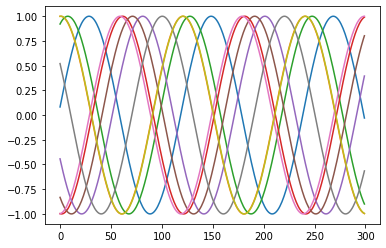

In [ ]:
N = 300
T = 120
t = np.arange(N)
Phi = np.random.rand(9)
print("Phi = ", Phi)
for phi in Phi:
  plt.plot(np.sin(2*np.pi*(t/T + phi)))

### Importo dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Dataset *TECO2*

In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/01 - UBA/5 - Series Temporales/Actividades TPs/Actividad 1/TECO2.2010.2021.csv")

In [ ]:
Data.head()

,Unnamed: 0,fechaHora,ultimoPrecio
0,0,2021-06-29 17:00:01.710,185.40
1,1,2021-06-28 17:00:03.597,184.50
2,2,2021-06-25 17:00:02.383,190.60
3,3,2021-06-24 17:00:03.497,191.45
4,4,2021-06-23 17:00:03.290,193.45


In [ ]:
# Cargar el dataset en memoria
#names = ['Index', 'Date', 'UltimoPrecio']
Data = pd.read_csv("/content/drive/MyDrive/01 - UBA/5 - Series Temporales/Actividades TPs/Actividad 1/TECO2.2010.2021.csv")#, names=names)

In [ ]:
Data.head()

,Unnamed: 0,fechaHora,ultimoPrecio
0,0,2021-06-29 17:00:01.710,185.40
1,1,2021-06-28 17:00:03.597,184.50
2,2,2021-06-25 17:00:02.383,190.60
3,3,2021-06-24 17:00:03.497,191.45
4,4,2021-06-23 17:00:03.290,193.45


In [ ]:
Data['ultimoPrecio']=pd.to_numeric(Data['ultimoPrecio'])
Data.index = Data['fechaHora']
Data.index = pd.to_datetime(Data['fechaHora'])

In [ ]:
Data.head()

,Unnamed: 0,fechaHora,ultimoPrecio
fechaHora,,,
2021-06-29 17:00:01.710,0,2021-06-29 17:00:01.710,185.40
2021-06-28 17:00:03.597,1,2021-06-28 17:00:03.597,184.50
2021-06-25 17:00:02.383,2,2021-06-25 17:00:02.383,190.60
2021-06-24 17:00:03.497,3,2021-06-24 17:00:03.497,191.45
2021-06-23 17:00:03.290,4,2021-06-23 17:00:03.290,193.45


In [ ]:
Data = Data.drop(['fechaHora'], axis=1)
Data = Data.drop(['Unnamed: 0'], axis=1)

In [ ]:
Data.head()

,ultimoPrecio
fechaHora,
2021-06-29 17:00:01.710,185.40
2021-06-28 17:00:03.597,184.50
2021-06-25 17:00:02.383,190.60
2021-06-24 17:00:03.497,191.45
2021-06-23 17:00:03.290,193.45


In [ ]:
#Realizo un análisis estadístico del dataset
Data.describe()

,ultimoPrecio
count,2771.000000
mean,71.413464
std,62.781924
min,8.551991
25%,16.555273
50%,44.966572
75%,122.900000
max,269.950000


In [ ]:
#Reviso si hay valores null o NaN
for column in Data:
   tot=Data[column].isnull().sum()
   print(column,"Porcentaje de Null",tot/len(Data[column])*100, '%')
for column in Data:
   tot=Data[column].isnull().values.any().sum()
   print(column,"Porcentaje de Nan",tot/len(Data[column])*100, '%')   

ultimoPrecio Porcentaje de Null 0.0 %
ultimoPrecio Porcentaje de Nan 0.0 %


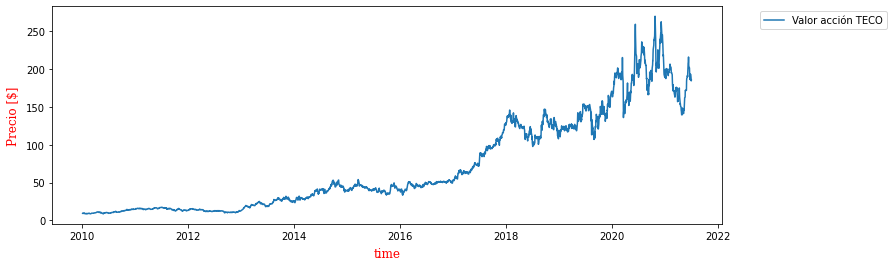

In [ ]:
plt.plot(Data['ultimoPrecio'], label="Valor acción TECO")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Precio [$]", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.rcParams["figure.figsize"]=(12,4)

In [ ]:
SerieY = Data['ultimoPrecio'].resample('MS').mean()

In [ ]:
SerieY.name='Valor accion TECO'
SerieY.head()

fechaHora
2010-01-01     9.189224
2010-02-01     9.029135
2010-03-01     9.493496
2010-04-01    10.815816
2010-05-01     9.798294
Freq: MS, Name: Valor accion TECO, dtype: float64

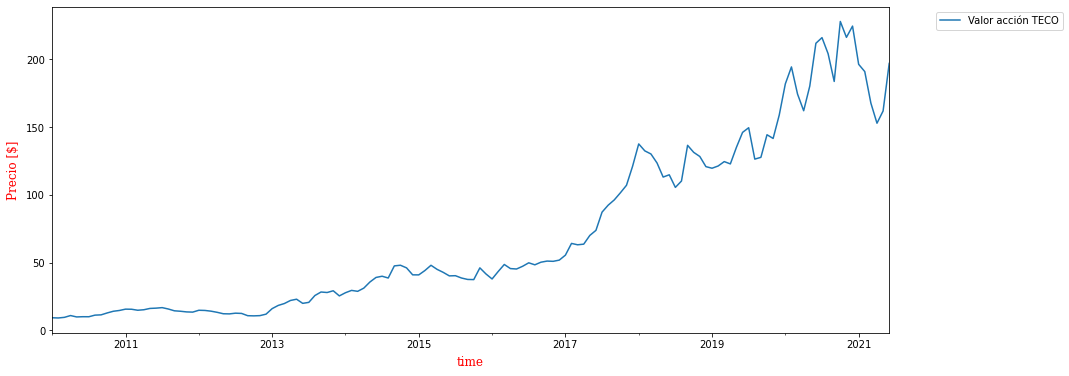

In [ ]:
SerieY.plot(figsize=(15, 6), label="Valor acción TECO")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Precio [$]", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.show()

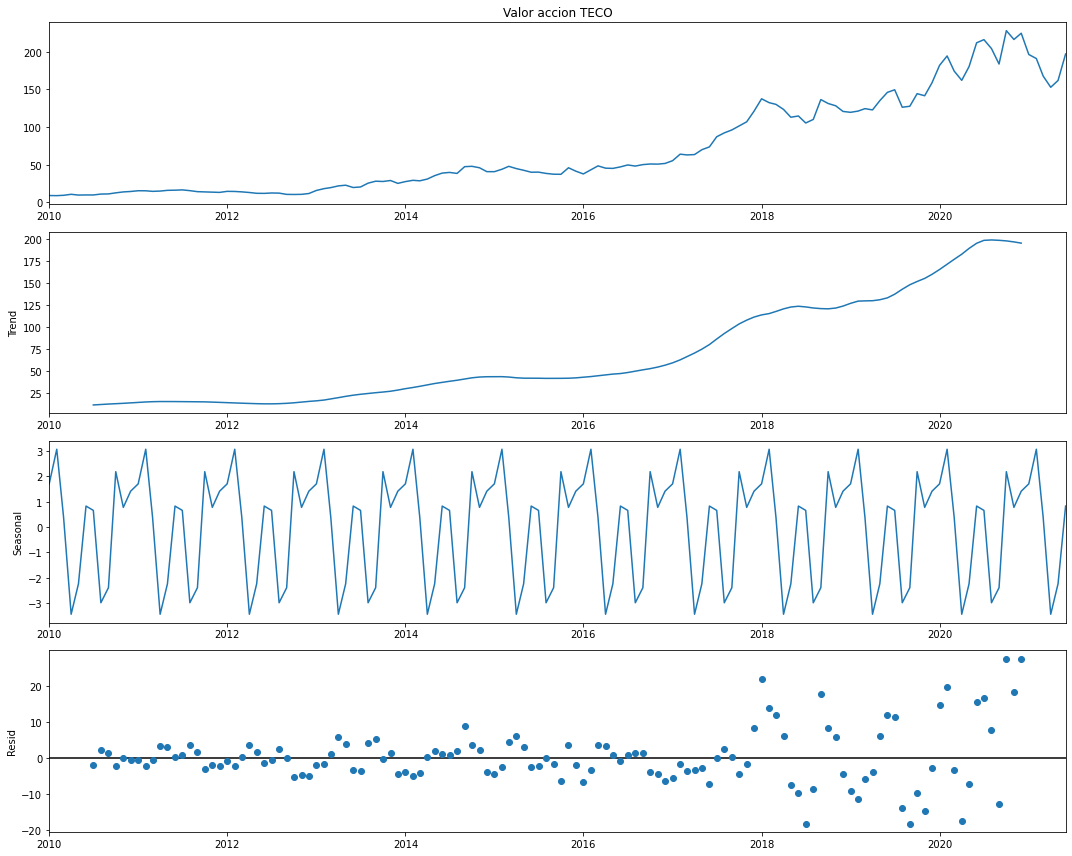

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
decomposition = sm.tsa.seasonal_decompose(SerieY, model='additive')
fig = decomposition.plot()
plt.show()

##Dataset TECO
El dataset corresponde a la evolución en el tiempo de las acciones de TELECOM ARGENTINA SA-SP Common Stock.

El dataset contiene datos desde 2010 hasta 2021. Los valores mínimos se encuentran al inicio del dataset (año 2010) siendo estos cercanos a \$8,55.
El valor máximo es alcanzado en 2021, llegando a \$269,95.
El valor promedio en el dataset es de \$71,41, con un desvío estandard de \$62,78.

El dataset es creciente en el tiempo, aunque presenta mínimos locales. Los más importantes, considero que son:
Mediados de 2018, inicio del 2020 y en inicios del 2021.
No se observa estacionariedad, y a simple vista, tampoco se observa estacionalidad.

Utilizando la herramienta *seasonal_decompose* de *pyLab* se logra suavizar la curva, pudiendo apreciar mejor el comportamiento, quitando "el ruido" de la curva. A su vez, se visualiza un comportamiento estacional con una frecuencia de 1 año. El residuo se incrementa en el tiempo, con media 0.


##Estudio dataset *Gaming*

In [ ]:
from matplotlib.pylab import datetime64
##Importo otro dataset
# Cargar el dataset en memoria
names = ['Date', 'ArenaOfValor', 'ClashRoyale',	'EAGamesFlat',	'Fortnite',	'GameLoft',	'Grand Total']
#Dtype = {'Fortnite':np.float64}
Data_gaming = pd.read_csv("/content/drive/MyDrive/01 - UBA/5 - Series Temporales/Actividades TPs/Actividad 1/Gaming.csv", delimiter=";", header=None, names=names, skiprows=1)#, index_col=0)

In [ ]:
Data_gaming.head()

,Date,ArenaOfValor,ClashRoyale,EAGamesFlat,Fortnite,GameLoft,Grand Total
0,Row Labels,ArenaOfValor,ClashRoyale,EAGamesFlat,Fortnite,GameLoft,Grand Total
1,2020-05-25 18,1.65,3.72,4.5,10.1,3.28,23.25
2,2020-05-25 19,2.5,3.38,9.08,13.15,3.42,31.53
3,2020-05-25 20,1.35,2.39,5.8,11.38,2.55,23.47
4,2020-05-25 21,2.1,1.82,4.37,8.72,1.52,18.53


In [ ]:
Data_gaming = Data_gaming.drop([0])
Data_gaming = Data_gaming.drop([234])

In [ ]:
Data_gaming.describe()

,Date,ArenaOfValor,ClashRoyale,EAGamesFlat,Fortnite,GameLoft,Grand Total
count,233,233,233,233,233,233,233
unique,233,166,178,214,200,200,224
top,2020-05-25 18,0.54,4.17,8.25,1.07,5.83,6.48
freq,1,4,5,2,3,3,2


In [ ]:
Data_gaming['Fortnite'].describe()

count    233.000000
mean       5.423004
std        3.511070
min        0.450000
25%        2.140000
50%        5.260000
75%        8.390000
max       14.340000
Name: Fortnite, dtype: float64

In [ ]:
Data_gaming['ArenaOfValor'].describe()

count    233.000000
mean       1.617639
std        1.184536
min        0.100000
25%        0.710000
50%        1.390000
75%        2.170000
max        6.360000
Name: ArenaOfValor, dtype: float64

In [ ]:
for column in Data_gaming:
   tot=Data_gaming[column].isnull().sum()
   print(column,"Porcentaje de Null",tot/len(Data_gaming[column])*100, '%')
for column in Data_gaming:
   tot=Data_gaming[column].isnull().values.any().sum()
   print(column,"Porcentaje de Nan",tot/len(Data_gaming[column])*100, '%')

Date Porcentaje de Null 0.0 %
ArenaOfValor Porcentaje de Null 0.0 %
ClashRoyale Porcentaje de Null 0.0 %
EAGamesFlat Porcentaje de Null 0.0 %
Fortnite Porcentaje de Null 0.0 %
GameLoft Porcentaje de Null 0.0 %
Grand Total Porcentaje de Null 0.0 %
Date Porcentaje de Nan 0.0 %
ArenaOfValor Porcentaje de Nan 0.0 %
ClashRoyale Porcentaje de Nan 0.0 %
EAGamesFlat Porcentaje de Nan 0.0 %
Fortnite Porcentaje de Nan 0.0 %
GameLoft Porcentaje de Nan 0.0 %
Grand Total Porcentaje de Nan 0.0 %


In [ ]:
#Data_gaming.index = pd.to_datetime(Data_gaming)

In [ ]:
Data_gaming.index = Data_gaming['Date']
Data_gaming.index = pd.to_datetime(Data_gaming['Date'])
#Data_gaming['Date'] = pd.DatetimeIndex(Data_gaming['Date'])

In [ ]:
Data_gaming.index

DatetimeIndex(['2020-05-25 18:00:00', '2020-05-25 19:00:00',
               '2020-05-25 20:00:00', '2020-05-25 21:00:00',
               '2020-05-25 22:00:00', '2020-05-25 23:00:00',
               '2020-05-26 00:00:00', '2020-05-26 01:00:00',
               '2020-05-26 02:00:00', '2020-05-26 03:00:00',
               ...
               '2020-06-04 01:00:00', '2020-06-04 02:00:00',
               '2020-06-04 03:00:00', '2020-06-04 04:00:00',
               '2020-06-04 05:00:00', '2020-06-04 06:00:00',
               '2020-06-04 07:00:00', '2020-06-04 08:00:00',
               '2020-06-04 09:00:00', '2020-06-04 10:00:00'],
              dtype='datetime64[ns]', name='Date', length=233, freq=None)

In [ ]:
#Convierto el tipo de datos
Data_gaming['ArenaOfValor']=pd.to_numeric(Data_gaming['ArenaOfValor'])
Data_gaming['ClashRoyale']=pd.to_numeric(Data_gaming['ClashRoyale'])
Data_gaming['EAGamesFlat']=pd.to_numeric(Data_gaming['EAGamesFlat'])
Data_gaming['Fortnite']=pd.to_numeric(Data_gaming['Fortnite'])
Data_gaming['GameLoft']=pd.to_numeric(Data_gaming['GameLoft'])
Data_gaming['Grand Total']=pd.to_numeric(Data_gaming['Grand Total'])

In [ ]:
Data_gaming.columns

Index(['Date', 'ArenaOfValor', 'ClashRoyale', 'EAGamesFlat', 'Fortnite',
       'GameLoft', 'Grand Total'],
      dtype='object')

In [ ]:
Data_gaming = Data_gaming.drop('Date', axis=1)

In [ ]:
Data_gaming.head()

,ArenaOfValor,ClashRoyale,EAGamesFlat,Fortnite,GameLoft,Grand Total
Date,,,,,,
2020-05-25 18:00:00,1.65,3.72,4.50,10.10,3.28,23.25
2020-05-25 19:00:00,2.50,3.38,9.08,13.15,3.42,31.53
2020-05-25 20:00:00,1.35,2.39,5.80,11.38,2.55,23.47
2020-05-25 21:00:00,2.10,1.82,4.37,8.72,1.52,18.53
2020-05-25 22:00:00,0.98,1.14,2.01,6.30,1.50,11.93


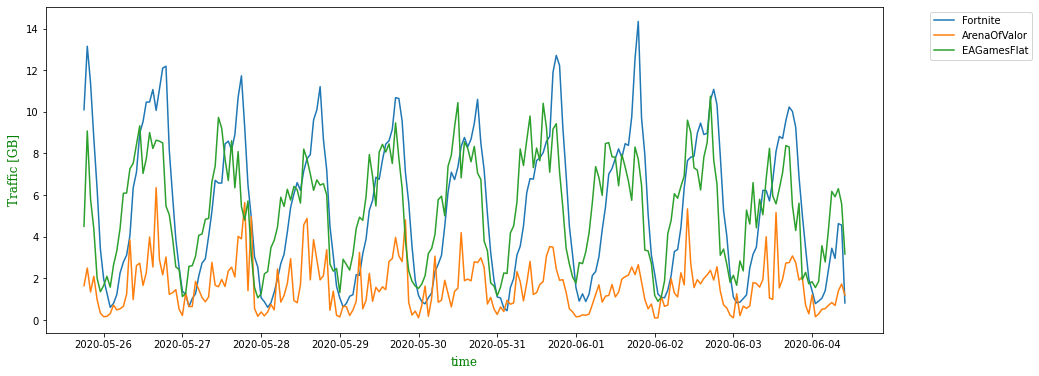

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(Data_gaming['Fortnite'], label='Fortnite')
plt.plot(Data_gaming['ArenaOfValor'], label='ArenaOfValor')
plt.plot(Data_gaming['EAGamesFlat'], label='EAGamesFlat')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Traffic [GB]", family='serif', color='g', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='g', weight='normal', size = 12, labelpad = 6)
plt.show()

##Dataset Gaming
Este dataset, corresponde al tráfico de datos en internet vinculados a 5 juegos.

El dataset contine datos horarios con valores próximos a 0 GB hasta 14,34 GB para *Fortnite*.

Se observa un claro comportamiento estacional, con un período de 24hs.

Como observaciones particulares, se puede decir que el público que juega a *EAGamesFlat* suele hacerlo un par de horas antes que los usuarios de *Fortnite*, quizá sea esto porque es un público etareo mayor, con responsabilidades laborales al día siguiente.

##Dataset RIGO.2012.2021

In [14]:
from matplotlib.pylab import datetime64
##Importo otro dataset
# Cargar el dataset en memoria
Data_RIGO = pd.read_csv("/content/drive/MyDrive/01 - UBA/5 - Series Temporales/Actividades TPs/Actividad 1/RIGO.2012.2021.csv", delimiter=",")#, header=None)#, names=names, skiprows=1)#, index_col=0)

In [15]:
Data_RIGO.head()

,Unnamed: 0,fechaHora,ultimoPrecio
0,0,2021-06-24 17:00:12.143,150.0
1,1,2021-06-23 12:00:20.050,150.0
2,2,2021-06-22 17:00:17.973,150.0
3,3,2021-06-18 12:00:07.107,151.0
4,4,2021-06-17 17:00:15.310,148.0


In [16]:
Data_RIGO = Data_RIGO.drop('Unnamed: 0', axis=1)
Data_RIGO.index = Data_RIGO['fechaHora']
Data_RIGO.index = pd.to_datetime(Data_RIGO['fechaHora'])
Data_RIGO = Data_RIGO.drop('fechaHora', axis=1)
Data_RIGO.head()

,ultimoPrecio
fechaHora,
2021-06-24 17:00:12.143,150.0
2021-06-23 12:00:20.050,150.0
2021-06-22 17:00:17.973,150.0
2021-06-18 12:00:07.107,151.0
2021-06-17 17:00:15.310,148.0


In [17]:
Data_RIGO.describe()

,ultimoPrecio
count,2759.000000
mean,40.722776
std,33.524323
min,5.085303
25%,18.423462
50%,27.983591
75%,60.000000
max,154.500000


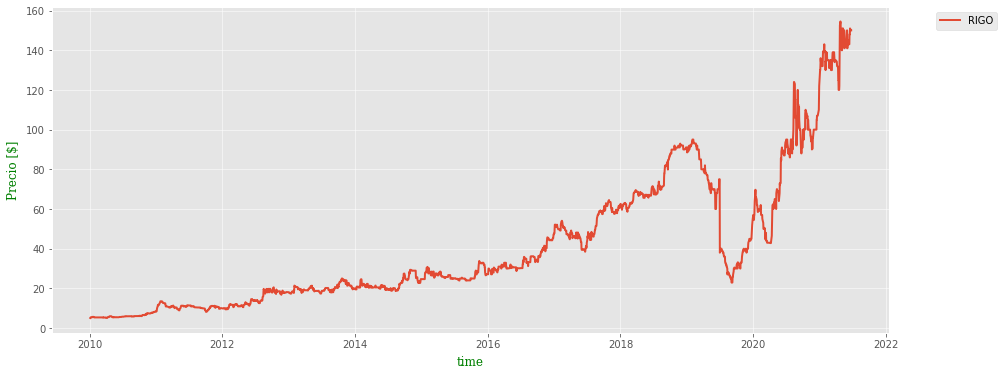

In [26]:
plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
plt.plot(Data_RIGO['ultimoPrecio'], label='RIGO')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Precio [$]", family='serif', color='g', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='g', weight='normal', size = 12, labelpad = 6)
plt.show()

In [27]:
SerieY_RIGO = Data_RIGO['ultimoPrecio'].resample('MS').mean()

In [28]:
SerieY_RIGO.name='Valor RIGO'
SerieY_RIGO.head()

fechaHora
2010-01-01    5.441279
2010-02-01    5.367826
2010-03-01    5.333153
2010-04-01    5.656677
2010-05-01    5.478248
Freq: MS, Name: Valor RIGO, dtype: float64

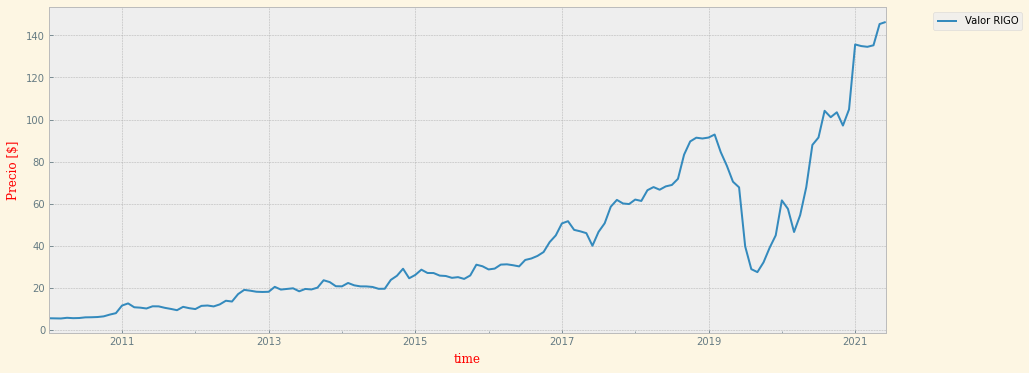

In [33]:
SerieY_RIGO.plot(figsize=(15, 6), label="Valor RIGO")
plt.style.use('bmh')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Precio [$]", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.show()

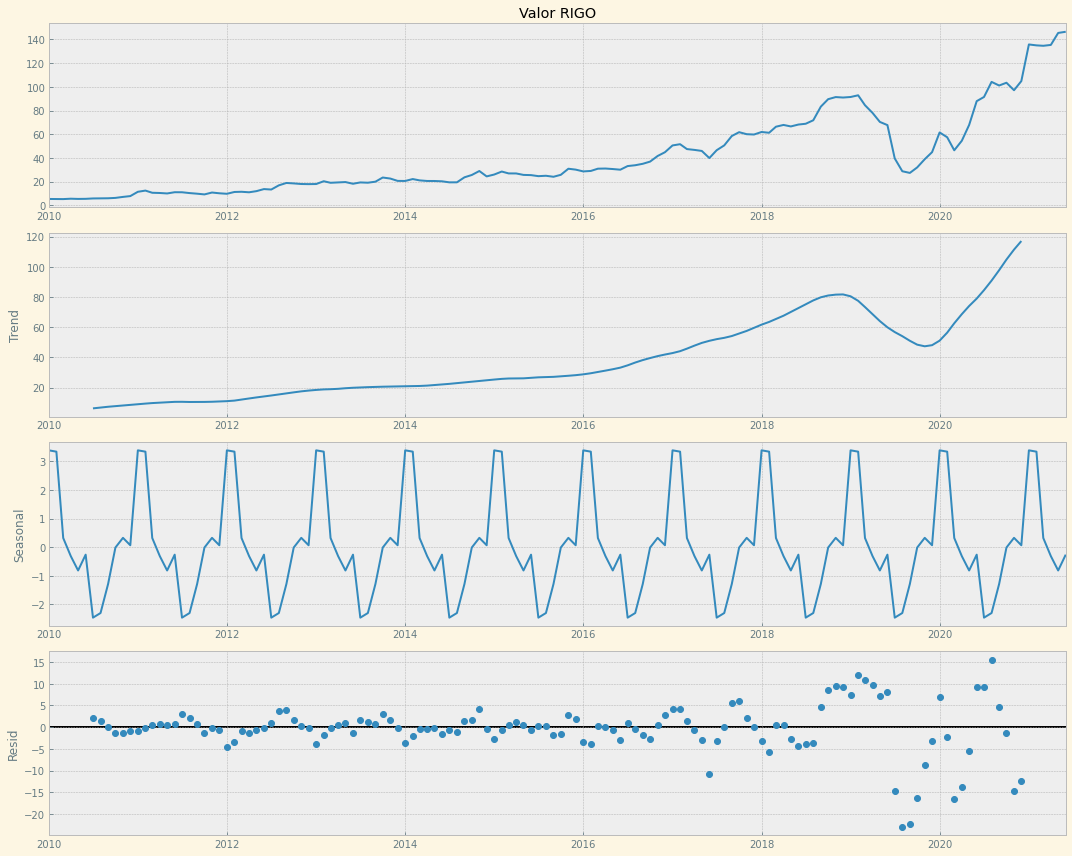

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
decomposition = sm.tsa.seasonal_decompose(SerieY_RIGO, model='additive')
fig = decomposition.plot()
plt.show()

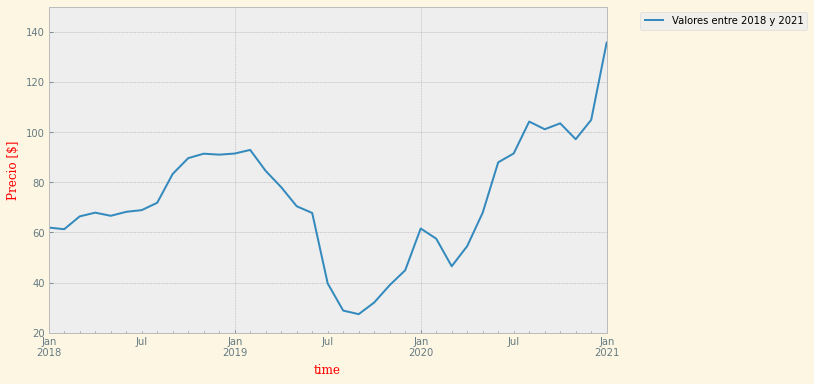

In [43]:
SerieY_RIGO.plot(figsize=(10, 6), label="Valores entre 2018 y 2021")
plt.xlim('2018','2021')
plt.ylim(20,150)
plt.style.use('bmh')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Precio [$]", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.show()

##Dataset RIGO
El dataset puede corresponder con la cotización de las acciones de Rigolleau.

Contiene datos entre el año 2010 y 2021. El spam de los valores es de 149,42 con valor mínimo de 5,085 y máximo de 154,5.

El gráfico muestra una tendencia creciente relativamente constante hasta el año 2019, momento en que se produce una caída abrupta, posiblemente por la pandemia COVID-19. Durante todo el 2019 presenta una caida llegando al mínimo local de $30 aproximadamente en Septiembre. A partir de ese mínimo, las acciones vuelven a subir, recuperando la tendencia previa, con algunas fluctuaciones de menor magnitud.

A primera vista, no se observan comportamientos estacionales. Luego de aplicar la herramienta *seasonal_decompose* de *pyLab* se obtiene una curva más suave. Al igual que con el dataset de las acciones de Telecom, se visualiza un comportamiento estacional con una frecuencia de 1 año y máximos durante el verano. Esto se puede deber a la temporada alta en la gastronomía. El residuo se incrementa en el tiempo, con media 0.